 Data Overview

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
df = pd.read_csv('/content/data.csv')  # adjust filename as needed

# Basic info
print("Dataset shape:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())
print("\nData types:")
print(df.dtypes)

Dataset shape: (95662, 16)

Column names:
['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'Amount', 'Value', 'TransactionStartTime', 'PricingStrategy', 'FraudResult']

Data types:
TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object


Summary statistics

In [3]:
# Quick look at the data
print("First few rows:")
print(df.head())


print("\nInfo about the dataset:")
print(df.info())

First few rows:
         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
4  TransactionId_28195   BatchId_38780  AccountId_4841  SubscriptionId_3829   

        CustomerId CurrencyCode  CountryCode    ProviderId     ProductId  \
0  CustomerId_4406          UGX          256  ProviderId_6  ProductId_10   
1  CustomerId_4406          UGX          256  ProviderId_4   ProductId_6   
2  CustomerId_4683          UGX          256  ProviderId_6   ProductId_1   
3   CustomerId_988          UGX          256  ProviderId_1  ProductId_21   
4   CustomerId_988          UGX          256  ProviderId_4   ProductId_6   

      ProductCategory    ChannelId   Amount  Value  

In [4]:
# Drop constant columns
df.drop(columns=['CountryCode', 'CurrencyCode'], inplace=True)

In [5]:
#drop duplicate columns
df.T.drop_duplicates()

,0,1,2,3,4,5,6,7,8,9,...,95652,95653,95654,95655,95656,95657,95658,95659,95660,95661
TransactionId,TransactionId_76871,TransactionId_73770,TransactionId_26203,TransactionId_380,TransactionId_28195,TransactionId_23223,TransactionId_118063,TransactionId_100640,TransactionId_51905,TransactionId_130161,...,TransactionId_71994,TransactionId_68851,TransactionId_18130,TransactionId_38907,TransactionId_68402,TransactionId_89881,TransactionId_91597,TransactionId_82501,TransactionId_136354,TransactionId_35670
BatchId,BatchId_36123,BatchId_15642,BatchId_53941,BatchId_102363,BatchId_38780,BatchId_25954,BatchId_118460,BatchId_38561,BatchId_93774,BatchId_82409,...,BatchId_66957,BatchId_100900,BatchId_20310,BatchId_92168,BatchId_17092,BatchId_96668,BatchId_3503,BatchId_118602,BatchId_70924,BatchId_29317
AccountId,AccountId_3957,AccountId_4841,AccountId_4229,AccountId_648,AccountId_4841,AccountId_1078,AccountId_2442,AccountId_4841,AccountId_272,AccountId_710,...,AccountId_620,AccountId_4841,AccountId_620,AccountId_4841,AccountId_2659,AccountId_4841,AccountId_3439,AccountId_4841,AccountId_1346,AccountId_4841
SubscriptionId,SubscriptionId_887,SubscriptionId_3829,SubscriptionId_222,SubscriptionId_2185,SubscriptionId_3829,SubscriptionId_4238,SubscriptionId_1980,SubscriptionId_3829,SubscriptionId_4731,SubscriptionId_920,...,SubscriptionId_1833,SubscriptionId_3829,SubscriptionId_1833,SubscriptionId_3829,SubscriptionId_3327,SubscriptionId_3829,SubscriptionId_2643,SubscriptionId_3829,SubscriptionId_652,SubscriptionId_3829
CustomerId,CustomerId_4406,CustomerId_4406,CustomerId_4683,CustomerId_988,CustomerId_988,CustomerId_1432,CustomerId_2858,CustomerId_2858,CustomerId_598,CustomerId_1053,...,CustomerId_960,CustomerId_539,CustomerId_960,CustomerId_960,CustomerId_3078,CustomerId_3078,CustomerId_3874,CustomerId_3874,CustomerId_1709,CustomerId_1709
ProviderId,ProviderId_6,ProviderId_4,ProviderId_6,ProviderId_1,ProviderId_4,ProviderId_6,ProviderId_5,ProviderId_4,ProviderId_6,ProviderId_1,...,ProviderId_1,ProviderId_4,ProviderId_6,ProviderId_4,ProviderId_6,ProviderId_4,ProviderId_6,ProviderId_4,ProviderId_6,ProviderId_4
ProductId,ProductId_10,ProductId_6,ProductId_1,ProductId_21,ProductId_6,ProductId_3,ProductId_3,ProductId_6,ProductId_10,ProductId_15,...,ProductId_15,ProductId_6,ProductId_1,ProductId_6,ProductId_10,ProductId_6,ProductId_10,ProductId_6,ProductId_19,ProductId_6
ProductCategory,airtime,financial_services,airtime,utility_bill,financial_services,airtime,airtime,financial_services,airtime,financial_services,...,financial_services,financial_services,airtime,financial_services,airtime,financial_services,airtime,financial_services,tv,financial_services
ChannelId,ChannelId_3,ChannelId_2,ChannelId_3,ChannelId_3,ChannelId_2,ChannelId_3,ChannelId_3,ChannelId_2,ChannelId_3,ChannelId_3,...,ChannelId_3,ChannelId_2,ChannelId_3,ChannelId_2,ChannelId_3,ChannelId_2,ChannelId_3,ChannelId_2,ChannelId_3,ChannelId_2
Amount,1000.0,-20.0,500.0,20000.0,-644.0,2000.0,10000.0,-500.0,500.0,600.0,...,1700.0,-140.0,1000.0,-50.0,50000.0,-1000.0,1000.0,-20.0,3000.0,-60.0


In [7]:
# For categorical columns
df.describe(include="object")

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,TransactionStartTime
count,95662,95662,95662,95662,95662,95662,95662,95662,95662,95662
unique,95662,94809,3633,3627,3742,6,23,9,4,94556
top,TransactionId_35670,BatchId_67019,AccountId_4841,SubscriptionId_3829,CustomerId_7343,ProviderId_4,ProductId_6,financial_services,ChannelId_3,2018-12-24T16:30:13Z
freq,1,28,30893,32630,4091,38189,32635,45405,56935,17


In [8]:
# For numeric columns
df.describe()

,Amount,Value,PricingStrategy,FraudResult
count,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,6.717846e+03,9.900584e+03,2.255974,0.002018
std,1.233068e+05,1.231221e+05,0.732924,0.044872
min,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,2.800000e+03,5.000000e+03,2.000000,0.000000
max,9.880000e+06,9.880000e+06,4.000000,1.000000


Distribution of Numerical Features

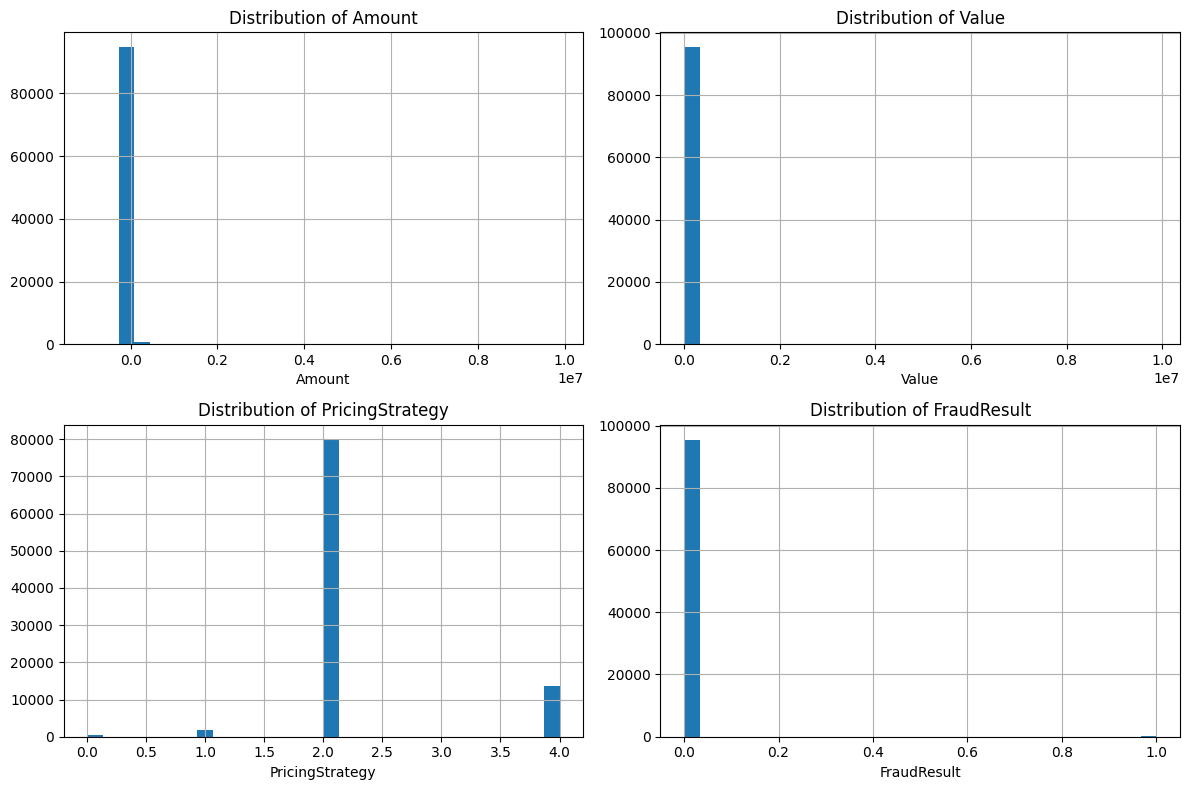

Skewness of numerical features:
Amount: 51.10
Value: 51.29
PricingStrategy: 1.66
FraudResult: 22.20


In [9]:
# Get numerical columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Plot distributions
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

for i, col in enumerate(num_cols[:4]):  # first 4 numerical columns
    df[col].hist(bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

# Check for skewness
print("Skewness of numerical features:")
for col in num_cols:
    skew = df[col].skew()
    print(f"{col}: {skew:.2f}")

Distribution of Categorical Features

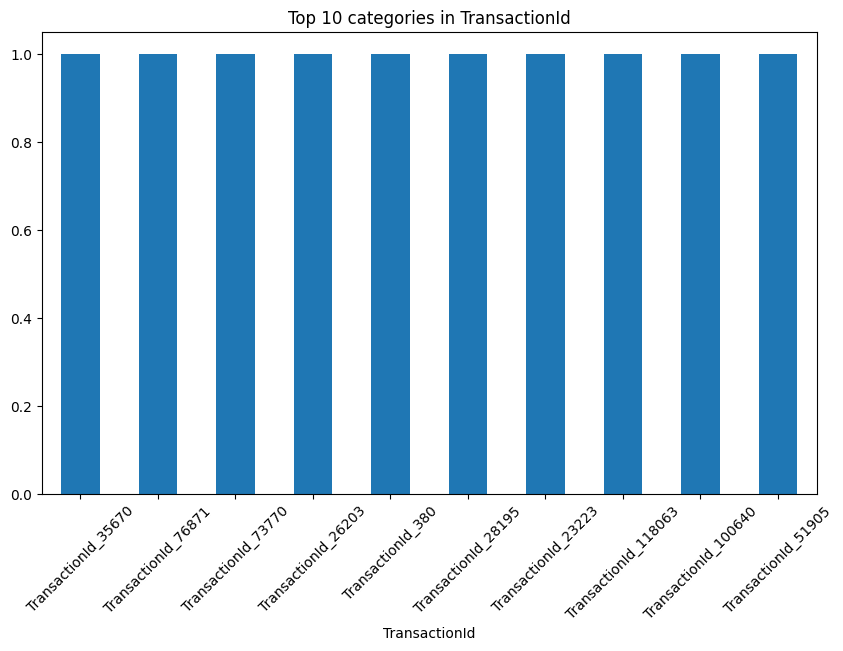


TransactionId - unique values: 95662
Top 5 categories:
TransactionId
TransactionId_35670    1
TransactionId_76871    1
TransactionId_73770    1
TransactionId_26203    1
TransactionId_380      1
Name: count, dtype: int64


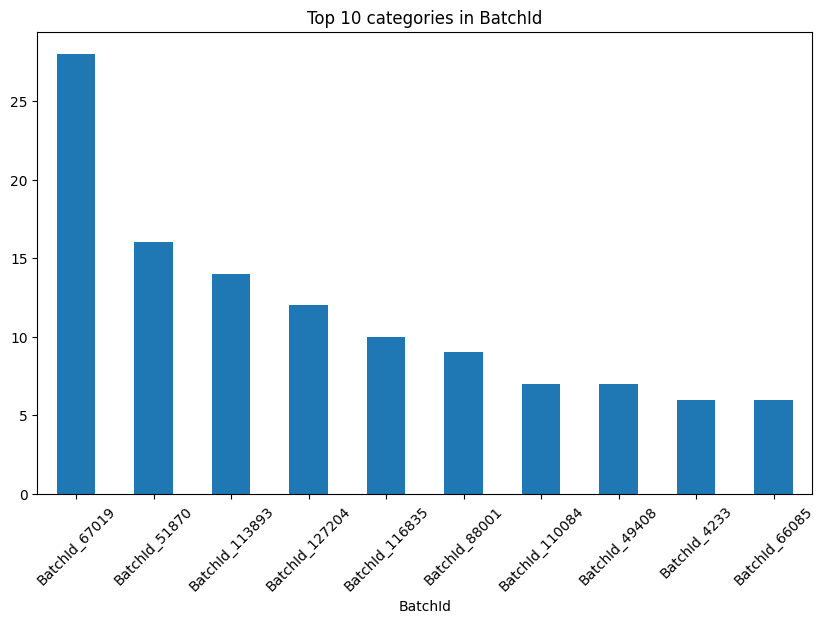


BatchId - unique values: 94809
Top 5 categories:
BatchId
BatchId_67019     28
BatchId_51870     16
BatchId_113893    14
BatchId_127204    12
BatchId_116835    10
Name: count, dtype: int64


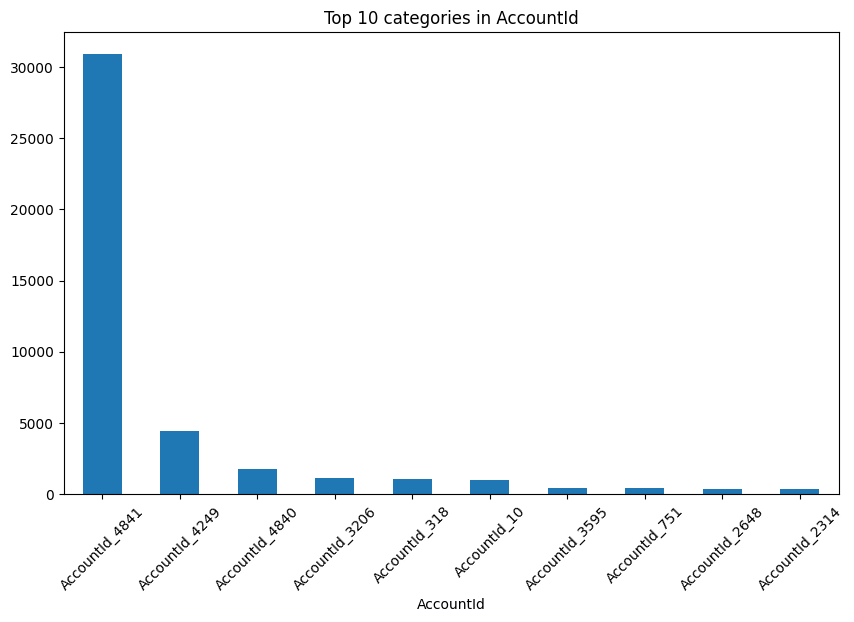


AccountId - unique values: 3633
Top 5 categories:
AccountId
AccountId_4841    30893
AccountId_4249     4457
AccountId_4840     1738
AccountId_3206     1105
AccountId_318      1070
Name: count, dtype: int64


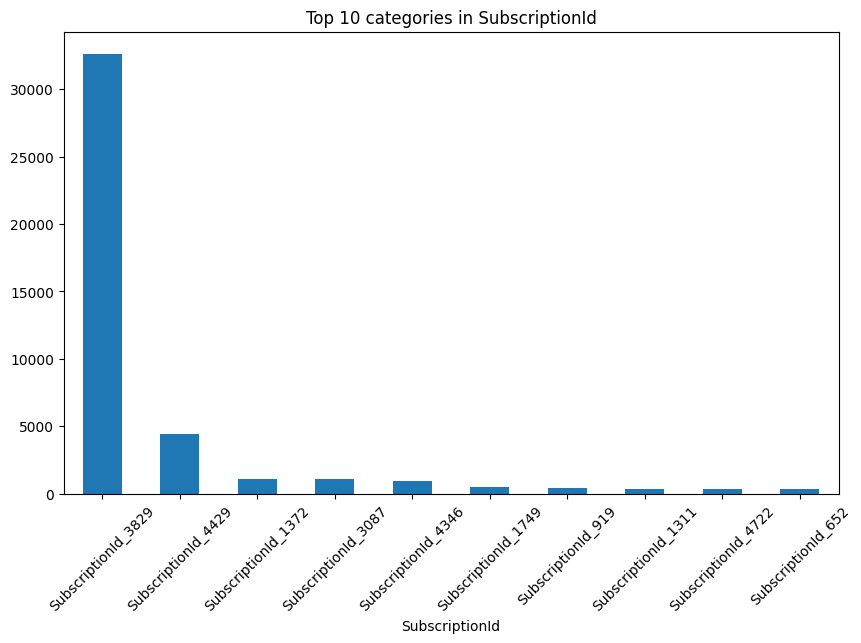


SubscriptionId - unique values: 3627
Top 5 categories:
SubscriptionId
SubscriptionId_3829    32630
SubscriptionId_4429     4457
SubscriptionId_1372     1105
SubscriptionId_3087     1070
SubscriptionId_4346      965
Name: count, dtype: int64


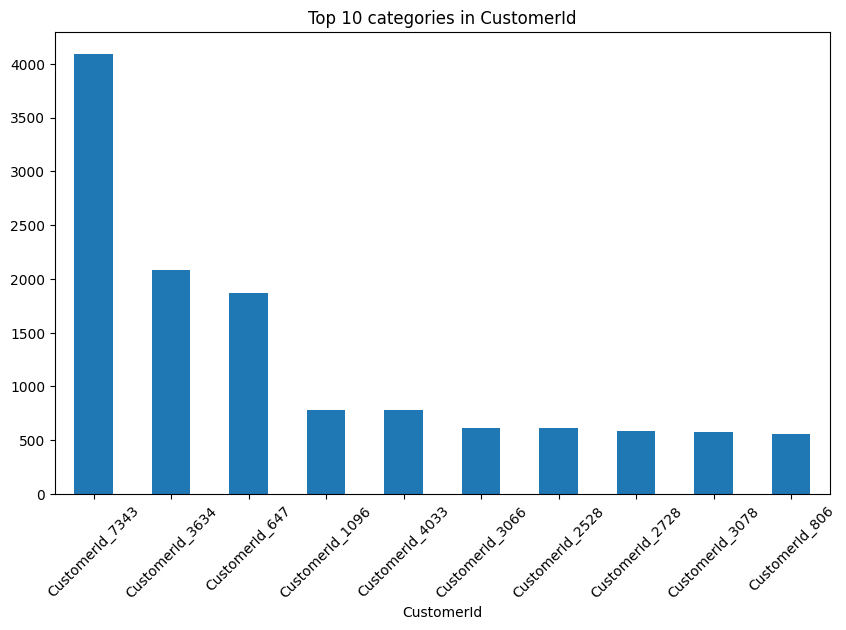


CustomerId - unique values: 3742
Top 5 categories:
CustomerId
CustomerId_7343    4091
CustomerId_3634    2085
CustomerId_647     1869
CustomerId_1096     784
CustomerId_4033     778
Name: count, dtype: int64


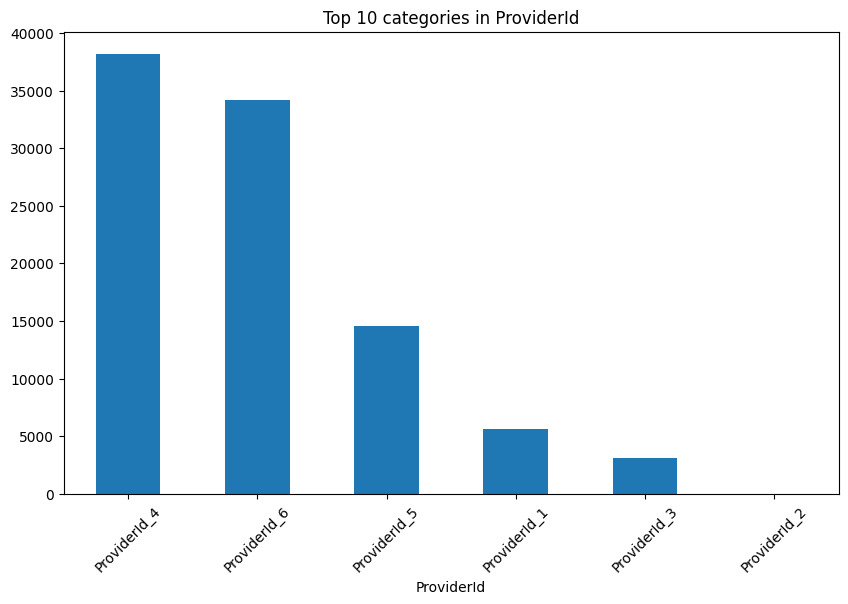


ProviderId - unique values: 6
Top 5 categories:
ProviderId
ProviderId_4    38189
ProviderId_6    34186
ProviderId_5    14542
ProviderId_1     5643
ProviderId_3     3084
Name: count, dtype: int64


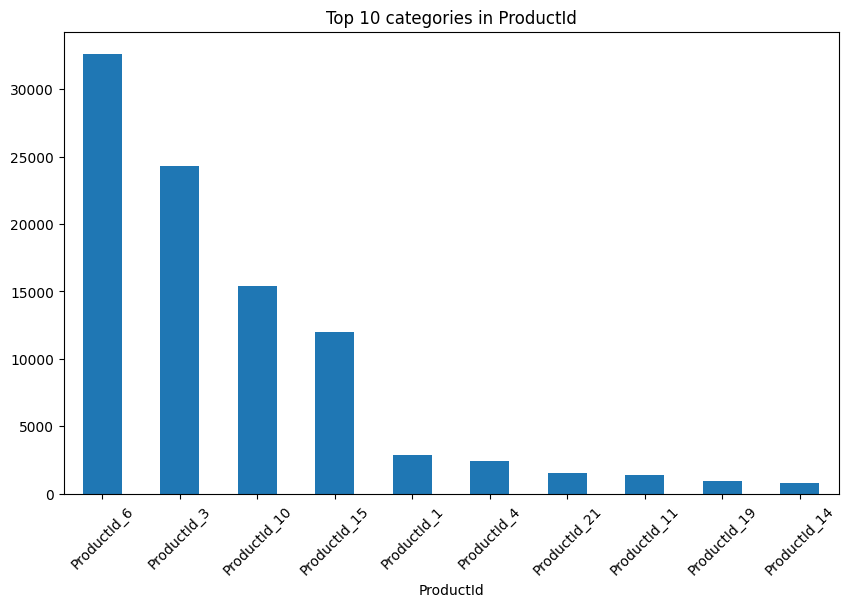


ProductId - unique values: 23
Top 5 categories:
ProductId
ProductId_6     32635
ProductId_3     24344
ProductId_10    15384
ProductId_15    11964
ProductId_1      2885
Name: count, dtype: int64


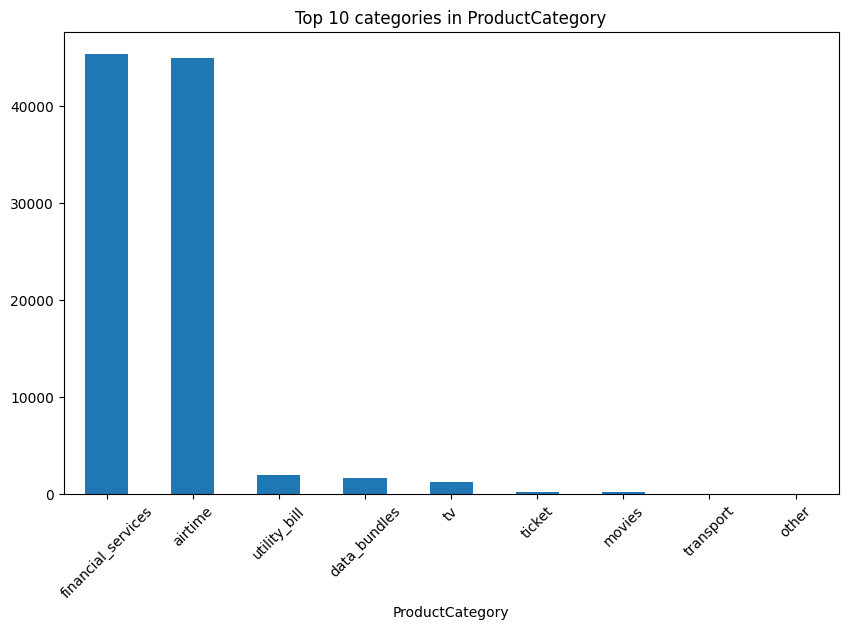


ProductCategory - unique values: 9
Top 5 categories:
ProductCategory
financial_services    45405
airtime               45027
utility_bill           1920
data_bundles           1613
tv                     1279
Name: count, dtype: int64


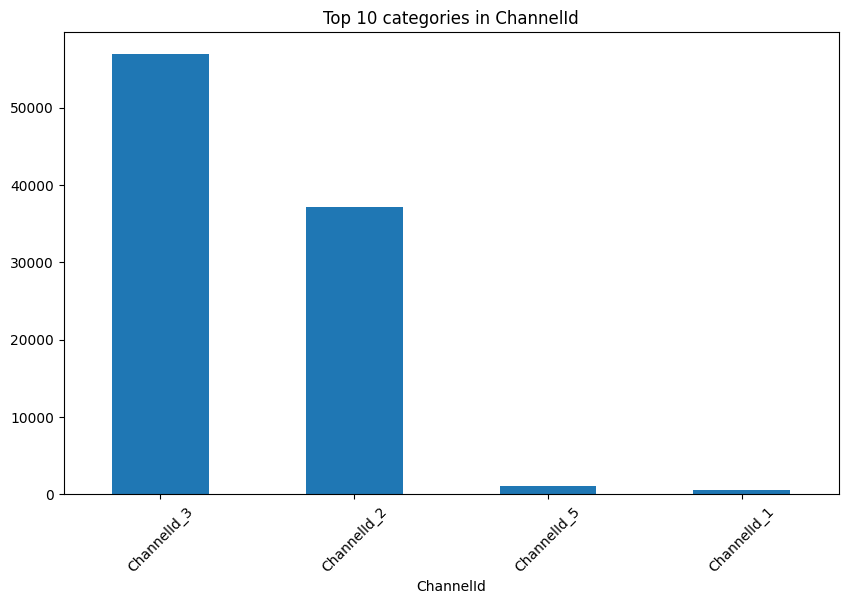


ChannelId - unique values: 4
Top 5 categories:
ChannelId
ChannelId_3    56935
ChannelId_2    37141
ChannelId_5     1048
ChannelId_1      538
Name: count, dtype: int64


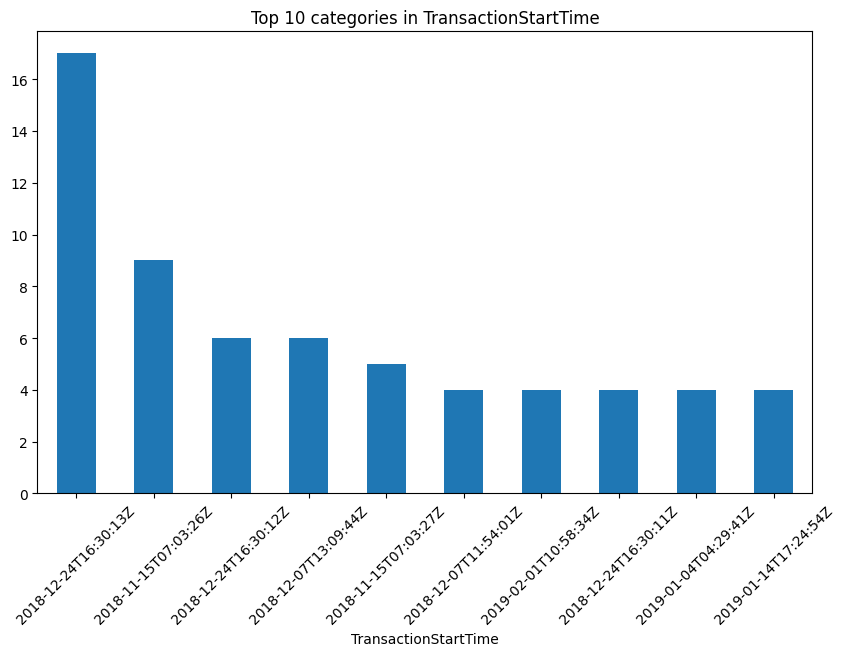


TransactionStartTime - unique values: 94556
Top 5 categories:
TransactionStartTime
2018-12-24T16:30:13Z    17
2018-11-15T07:03:26Z     9
2018-12-24T16:30:12Z     6
2018-12-07T13:09:44Z     6
2018-11-15T07:03:27Z     5
Name: count, dtype: int64


In [10]:
# Get categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

# Plot top categories for each categorical column
for col in cat_cols:
    plt.figure(figsize=(10, 6))
    top_cats = df[col].value_counts().head(10)
    top_cats.plot(kind='bar')
    plt.title(f'Top 10 categories in {col}')
    plt.xticks(rotation=45)
    plt.show()

    print(f"\n{col} - unique values: {df[col].nunique()}")
    print(f"Top 5 categories:\n{df[col].value_counts().head()}")

Correlation Analysis

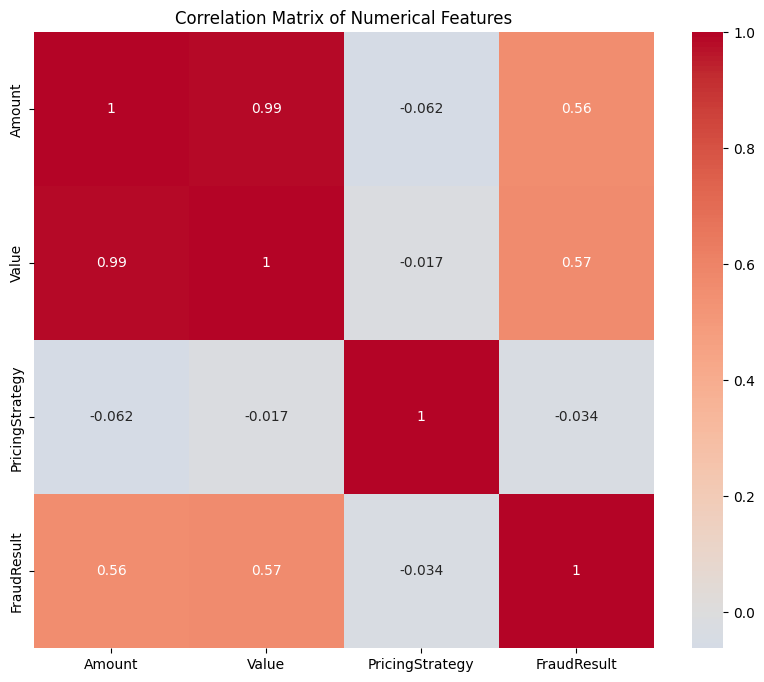

Highly correlated pairs (>0.7):
Amount - Value: 0.990


In [11]:
# Correlation matrix for numerical features
corr_matrix = df[num_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Find highly correlated pairs
high_corr = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            high_corr.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

print("Highly correlated pairs (>0.7):")
for pair in high_corr:
    print(f"{pair[0]} - {pair[1]}: {pair[2]:.3f}")

Missing Values Analysis

In [14]:
# Check missing values
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percent': missing_percent
})

print("Missing values summary:")
# Filter for columns with missing values
missing_df_filtered = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Percent', ascending=False)
print(missing_df_filtered)

# Visualize missing data if there are any
if not missing_df_filtered.empty:
    plt.figure(figsize=(12, 6))
    missing_df_filtered.plot(kind='bar', y='Missing Percent')
    plt.title('Missing Data Percentage by Column')
    plt.ylabel('Percentage Missing')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("\nNo missing values to visualize.")

Missing values summary:
Empty DataFrame
Columns: [Missing Count, Missing Percent]
Index: []

No missing values to visualize.


Outlier Detection

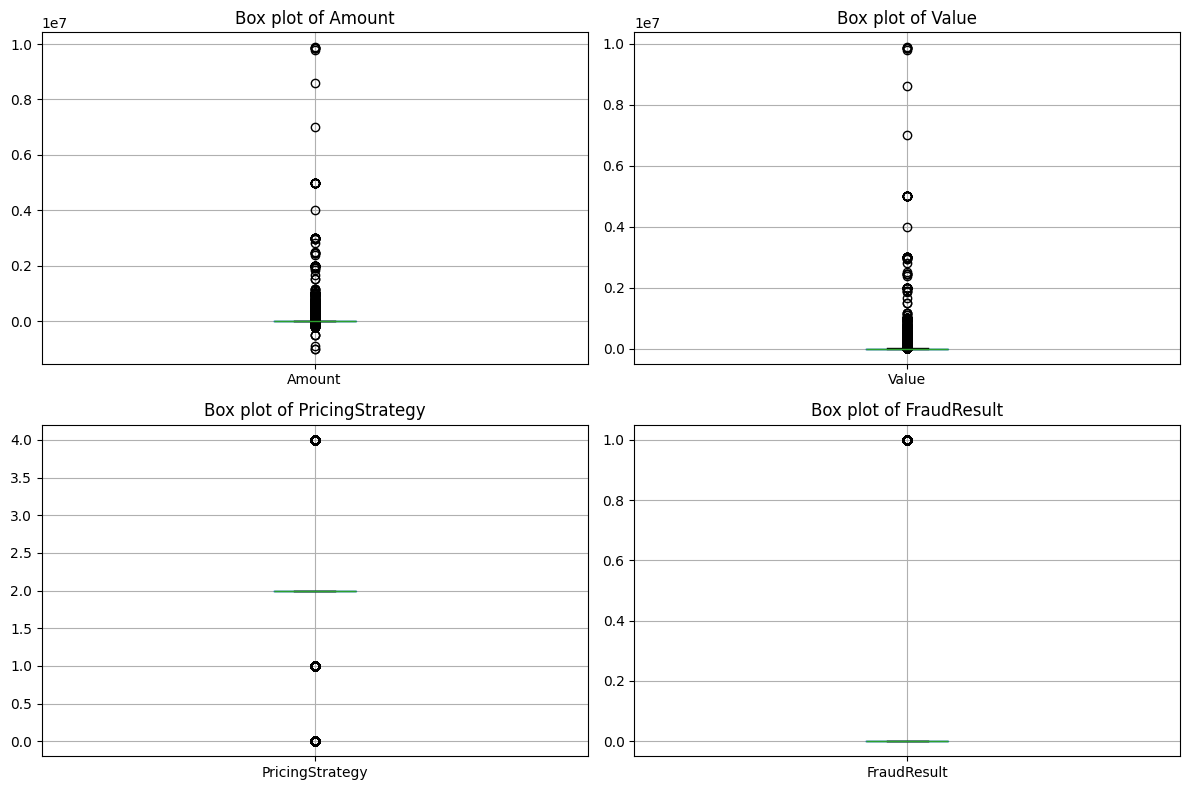

Outlier counts by column:
Amount: 24441 outliers (25.5%)
Value: 9021 outliers (9.4%)
PricingStrategy: 15814 outliers (16.5%)
FraudResult: 193 outliers (0.2%)


In [13]:
# Box plots for numerical features
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

for i, col in enumerate(num_cols[:4]):
    df.boxplot(column=col, ax=axes[i])
    axes[i].set_title(f'Box plot of {col}')

plt.tight_layout()
plt.show()

# IQR method for outlier detection
def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return len(outliers)

print("Outlier counts by column:")
for col in num_cols:
    outlier_count = detect_outliers(df, col)
    outlier_percent = (outlier_count / len(df)) * 100
    print(f"{col}: {outlier_count} outliers ({outlier_percent:.1f}%)")